<a href="https://colab.research.google.com/github/sujeongzoe/KDT/blob/main/%5BBrain_Tumor%5D230407_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/KDT_project/train/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/train/total/og.zip"

/content/drive/MyDrive/KDT_project/train/total/data/yes


In [ ]:
%cd /content/drive/MyDrive/KDT_project/train/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/train/total/tg.zip"

/content/drive/MyDrive/KDT_project/train/total/data/yes


In [ ]:
%cd /content/drive/MyDrive/KDT_project/train/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/train/total/p (93).zip"

/content/drive/MyDrive/KDT_project/train/total/data/yes


In [ ]:
%cd /content/drive/MyDrive/KDT_project/train/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/train/total/m3 (98).zip"

/content/drive/MyDrive/KDT_project/train/total/data/yes


In [ ]:
%cd /content/drive/MyDrive/KDT_project/train/total/data/no

!unzip -qq "/content/drive/MyDrive/KDT_project/train/total/no.zip"

/content/drive/MyDrive/KDT_project/train/total/data/no


In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/total/data/no

!unzip -qq "/content/drive/MyDrive/KDT_project/test/total/image(97).zip"

/content/drive/MyDrive/KDT_project/test/total/data/no


In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/test/total/g_2.zip"

/content/drive/MyDrive/KDT_project/test/total/data/yes


In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/test/total/m_113.zip"

/content/drive/MyDrive/KDT_project/test/total/data/yes


In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/test/total/p_69.zip"

/content/drive/MyDrive/KDT_project/test/total/data/yes


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers,preprocessing
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.metrics import AUC

In [ ]:
main_dir = "/content/drive/MyDrive/KDT_project/"
classification_dirs = [("no",), ("yes",)]
resolution = 224

def load_images(root_dir_name):
    x = []
    y = []

    for label, sub_dir_names in enumerate(classification_dirs):
        for sub_dir_name in sub_dir_names:
            print(f"loading {root_dir_name} {sub_dir_name}")
            sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
            for image_name in os.listdir(sub_dir_path):
                image_path = os.path.join(sub_dir_path, image_name)
                image = preprocessing.image.load_img(image_path, target_size=(resolution, resolution))   # keras load_img
                x.append(preprocessing.image.img_to_array(image))   # 이미지를 numpy array로 변환
                y.append(label)

    x = np.array(x) / 255.0
    y = np.array(y)

    return x, y

In [ ]:
X_train, y_train = load_images("train/total/data")
X_test, y_test = load_images("test/total/data")

loading test/total/data no
loading test/total/data yes


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(2870, 224, 224, 3) (2870,)
(510, 224, 224, 3) (510,)


In [ ]:
2870+510

3380

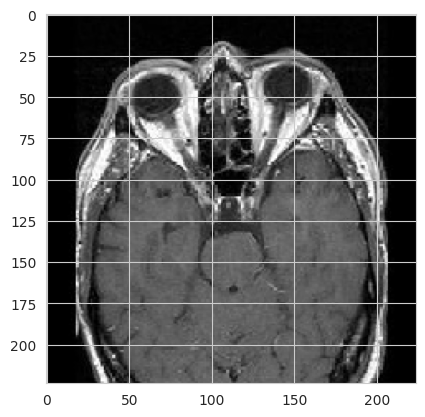

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# Dropout-layer + GAP + Batch-normalization
# 모델 생성 (VGG16)
model = tf.keras.Sequential([

    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),   # 피쳐 방향으로 다 더해준다.(flatten 했을 경우 데이터가 너무 많아 오버피팅 되는 것을 방지)
    layers.Flatten(),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_13 (Bat  (None, 222, 222, 64)     256       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 batch_normalization_14 (Bat  (None, 220, 220, 64)     256       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                      

In [ ]:
# 모델 컴파일
lr = 0.000001
model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                loss='binary_crossentropy',
                metrics=['accuracy', AUC(name='AUC')])



In [ ]:
# 모델 학습
from tensorflow.python.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=20, mode="min")

history = model.fit(X_train, y_train, epochs=150, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/150
90/90 [==============================] - 96s 683ms/step - loss: 0.4059 - accuracy: 0.8617 - AUC: 0.6065 - val_loss: 0.6019 - val_accuracy: 0.7941 - val_AUC: 0.5025
Epoch 2/150
90/90 [==============================] - 42s 463ms/step - loss: 0.3177 - accuracy: 0.8780 - AUC: 0.8230 - val_loss: 0.5153 - val_accuracy: 0.7941 - val_AUC: 0.6135
Epoch 3/150
90/90 [==============================] - 41s 458ms/step - loss: 0.2759 - accuracy: 0.8983 - AUC: 0.8705 - val_loss: 0.5428 - val_accuracy: 0.7941 - val_AUC: 0.6322
Epoch 4/150
90/90 [==============================] - 42s 467ms/step - loss: 0.2505 - accuracy: 0.9035 - AUC: 0.8919 - val_loss: 0.6525 - val_accuracy: 0.7941 - val_AUC: 0.5034
Epoch 5/150
90/90 [==============================] - 42s 464ms/step - loss: 0.2269 - accuracy: 0.9167 - AUC: 0.9162 - val_loss: 0.6174 - val_accuracy: 0.7941 - val_AUC: 0.5379
Epoch 6/150
90/90 [==============================] - 41s 459ms/step - loss: 0.2075 - accuracy: 0.9188 - AUC: 0.9367 - va

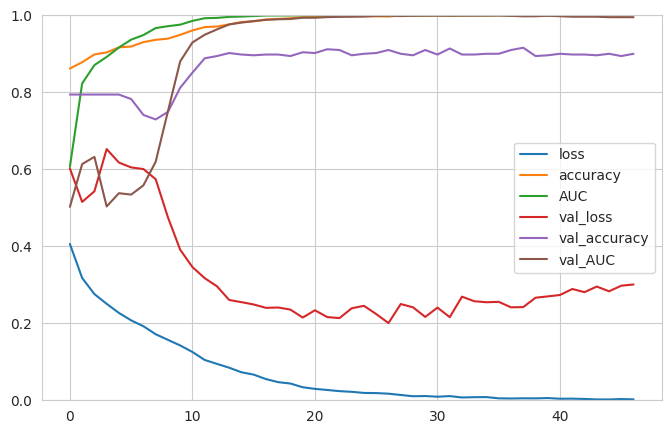

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUROC: ', roc_auc)

16/16 [==============================] - 2s 125ms/step
AUROC:  0.9995061728395062


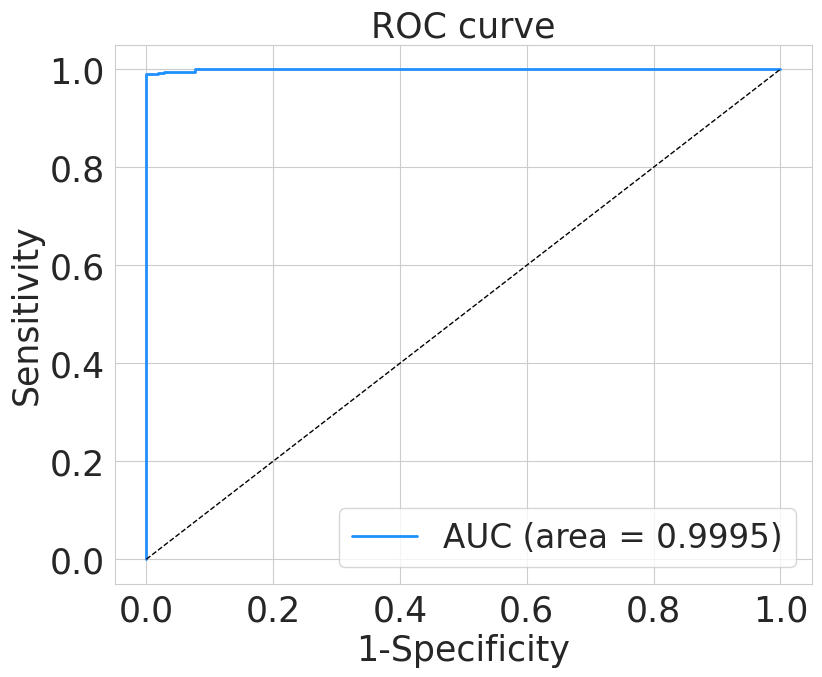

In [ ]:
plt.figure(figsize=[9,7])
plt.plot(fpr, tpr, color='dodgerblue', lw=2, label='AUC (area = %0.4f)' % roc_auc)
plt.plot([0,1], [0,1], color='black', lw=1, linestyle='--')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('1-Specificity', fontsize=25)  # FPR
plt.ylabel('Sensitivity', fontsize=25)
plt.title('ROC curve', fontsize=25)
plt.legend(loc='lower right', fontsize=23.5)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/test/total/m.zip"

/content/drive/MyDrive/KDT_project/test/total/data/yes


In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/total/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/test/total/image(95).zip"

In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/total/data/no

!unzip -qq "/content/drive/MyDrive/KDT_project/train/total/no.zip"

In [ ]:
%cd /content/drive/MyDrive/KDT_project/train/data/no

!unzip -qq "/content/drive/MyDrive/KDT_project/train/y_train.zip"

/content/drive/MyDrive/KDT_project/train/data/no


In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/data/no

!unzip -qq "/content/drive/MyDrive/KDT_project/test/y_test.zip"

/content/drive/MyDrive/KDT_project/test/data/no


In [ ]:
%cd /content/drive/MyDrive/KDT_project/test/data/yes

!unzip -qq "/content/drive/MyDrive/KDT_project/test/test.zip"

/content/drive/MyDrive/KDT_project/test/data/yes


# Model1 : brain tumor YES/NO classification
# Model2 : brain tumor pituitary/meningioma/glioma//no classification

## Model1

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers,preprocessing
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout

In [ ]:
main_dir = "/content/drive/MyDrive/KDT_project/"
classification_dirs = [("no",), ("yes",)]
resolution = 224

def load_images(root_dir_name):
    x = []
    y = []

    for label, sub_dir_names in enumerate(classification_dirs):
        for sub_dir_name in sub_dir_names:
            print(f"loading {root_dir_name} {sub_dir_name}")
            sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
            for image_name in os.listdir(sub_dir_path):
                image_path = os.path.join(sub_dir_path, image_name)
                image = preprocessing.image.load_img(image_path, target_size=(resolution, resolution))   # keras load_img
                x.append(preprocessing.image.img_to_array(image))   # 이미지를 numpy array로 변환
                y.append(label)

    x = np.array(x) / 255.0
    y = np.array(y)

    return x, y

In [ ]:
X_train, y_train = load_images("train/data")
X_test, y_test = load_images("test/data")

loading train/data no
loading train/data yes
loading test/data no
loading test/data yes


In [ ]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)
# RGB 영상이 아닌데 왜 channel이 3개일까...

(1078, 224, 224, 3) (1078,) (231, 224, 224, 3) (231,)


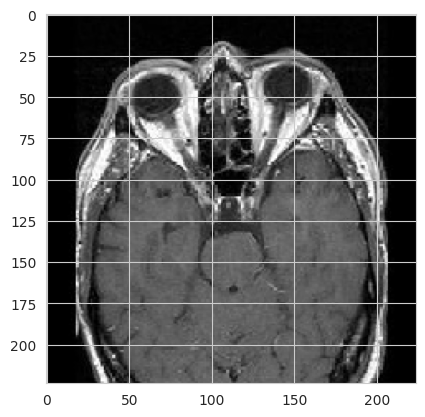

In [ ]:
plt.imshow(X_train[0])

In [ ]:
# 모델 생성 (VGG16)
model = tf.keras.Sequential([

    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation='relu'),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(4069, activation='relu'),
    layers.Dense(4069, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 110, 110, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 108, 108, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 53, 53, 128)      0         
 g2D)                                                 

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
34/34 [==============================] - 54s 715ms/step - loss: 7.0293 - accuracy: 0.7570 - val_loss: 0.7684 - val_accuracy: 0.5844
Epoch 2/10
34/34 [==============================] - 13s 374ms/step - loss: 0.5611 - accuracy: 0.7570 - val_loss: 0.7559 - val_accuracy: 0.5844
Epoch 3/10
34/34 [==============================] - 13s 376ms/step - loss: 0.5592 - accuracy: 0.7570 - val_loss: 0.8545 - val_accuracy: 0.5844
Epoch 4/10
34/34 [==============================] - 13s 374ms/step - loss: 0.5582 - accuracy: 0.7570 - val_loss: 0.7811 - val_accuracy: 0.5844
Epoch 5/10
34/34 [==============================] - 13s 370ms/step - loss: 0.5613 - accuracy: 0.7570 - val_loss: 0.7241 - val_accuracy: 0.5844
Epoch 6/10
34/34 [==============================] - 12s 351ms/step - loss: 0.5572 - accuracy: 0.7570 - val_loss: 0.7601 - val_accuracy: 0.5844
Epoch 7/10
34/34 [==============================] - 12s 350ms/step - loss: 0.5556 - accuracy: 0.7570 - val_loss: 0.7529 - val_accuracy: 0.5844

In [ ]:
# Dropout-layer 추가
# 모델 생성 (VGG16)
model = tf.keras.Sequential([

    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation='relu'),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
34/34 [==============================] - 46s 686ms/step - loss: 5.0775 - accuracy: 0.7468 - val_loss: 0.7874 - val_accuracy: 0.5844
Epoch 2/10
34/34 [==============================] - 12s 349ms/step - loss: 0.5547 - accuracy: 0.7570 - val_loss: 0.7195 - val_accuracy: 0.5844
Epoch 3/10
34/34 [==============================] - 12s 367ms/step - loss: 0.5575 - accuracy: 0.7570 - val_loss: 0.7682 - val_accuracy: 0.5844
Epoch 4/10
34/34 [==============================] - 13s 373ms/step - loss: 0.5563 - accuracy: 0.7570 - val_loss: 0.7064 - val_accuracy: 0.5844
Epoch 5/10
34/34 [==============================] - 12s 363ms/step - loss: 0.5558 - accuracy: 0.7570 - val_loss: 0.7760 - val_accuracy: 0.5844
Epoch 6/10
34/34 [==============================] - 12s 363ms/step - loss: 0.5583 - accuracy: 0.7570 - val_loss: 0.7544 - val_accuracy: 0.5844
Epoch 7/10
34/34 [==============================] - 13s 374ms/step - loss: 0.5546 - accuracy: 0.7570 - val_loss: 0.7380 - val_accuracy: 0.5844

In [ ]:
# Dropout-layer + GAP
# 모델 생성 (VGG16)
model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation='relu'),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),   # 피쳐 방향으로 다 더해준다.(flatten 했을 경우 데이터가 너무 많아 오버피팅 되는 것을 방지)
    layers.Flatten(),
    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
# 모델 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
34/34 [==============================] - 58s 753ms/step - loss: 1.1450 - accuracy: 0.7477 - val_loss: 0.7431 - val_accuracy: 0.5844
Epoch 2/10
34/34 [==============================] - 13s 392ms/step - loss: 0.5573 - accuracy: 0.7570 - val_loss: 0.7401 - val_accuracy: 0.5844
Epoch 3/10
34/34 [==============================] - 13s 382ms/step - loss: 0.5588 - accuracy: 0.7570 - val_loss: 0.7953 - val_accuracy: 0.5844
Epoch 4/10
34/34 [==============================] - 13s 376ms/step - loss: 0.5590 - accuracy: 0.7570 - val_loss: 0.6952 - val_accuracy: 0.5844
Epoch 5/10
34/34 [==============================] - 12s 359ms/step - loss: 0.5615 - accuracy: 0.7570 - val_loss: 0.7303 - val_accuracy: 0.5844
Epoch 6/10
34/34 [==============================] - 12s 360ms/step - loss: 0.5607 - accuracy: 0.7570 - val_loss: 0.7628 - val_accuracy: 0.5844
Epoch 7/10
34/34 [==============================] - 12s 362ms/step - loss: 0.5578 - accuracy: 0.7570 - val_loss: 0.7599 - val_accuracy: 0.5844

### loss가 이전 두 모델보다는 상대적으로 감소함

## 코드 대대적 수정
## 처음부터 다시 돌려봐야할듯

In [ ]:
## CNN 뒤에 FC를 잘못적용한듯?!?!해서 수정함.
# padding과 strides가 추가됨. 4/7 오전 강의본 참고해서 변경됨...

In [ ]:
# # 모델 생성 (VGG16)
# model = tf.keras.Sequential([

#     layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224,224,3)),
#     layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

#     layers.Conv2D(128,(3,3), padding='same', activation='relu'),
#     layers.Conv2D(128,(3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

#     layers.Conv2D(256, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.Conv2D(512, (3,3), padding='same', activation='relu'),
#     layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

#     layers.GlobalAveragePooling2D(),   # 피쳐 방향으로 다 더해준다.(flatten 했을 경우 데이터가 너무 많아 오버피팅 되는 것을 방지)

#     layers.Flatten(),

#     layers.Dense(4069, activation='relu'),
#     layers.Dropout(0.2),

#     layers.Dense(4069, activation='relu'),
#     layers.Dropout(0.2),

#     layers.Dense(1, activation='sigmoid')
# ])

# model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
# 모델 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
34/34 [==============================] - 46s 796ms/step - loss: 9.1533 - accuracy: 0.7551 - val_loss: 0.7419 - val_accuracy: 0.5844
Epoch 2/10
34/34 [==============================] - 15s 447ms/step - loss: 0.5616 - accuracy: 0.7570 - val_loss: 0.8066 - val_accuracy: 0.5844
Epoch 3/10
34/34 [==============================] - 15s 436ms/step - loss: 0.5570 - accuracy: 0.7570 - val_loss: 0.7745 - val_accuracy: 0.5844
Epoch 4/10
34/34 [==============================] - 15s 449ms/step - loss: 0.5567 - accuracy: 0.7570 - val_loss: 0.7941 - val_accuracy: 0.5844
Epoch 5/10
34/34 [==============================] - 15s 445ms/step - loss: 0.5549 - accuracy: 0.7570 - val_loss: 0.7249 - val_accuracy: 0.5844
Epoch 6/10
34/34 [==============================] - 15s 454ms/step - loss: 0.5577 - accuracy: 0.7570 - val_loss: 0.7069 - val_accuracy: 0.5844
Epoch 7/10
34/34 [==============================] - 15s 442ms/step - loss: 0.5584 - accuracy: 0.7570 - val_loss: 0.7555 - val_accuracy: 0.5844

In [ ]:
# Dropout-layer + GAP + Batch-normalization
# 모델 생성 (VGG16)
model = tf.keras.Sequential([

    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),   # 피쳐 방향으로 다 더해준다.(flatten 했을 경우 데이터가 너무 많아 오버피팅 되는 것을 방지)
    layers.Flatten(),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 220, 220, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                        

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
# 모델 학습
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
34/34 [==============================] - 61s 977ms/step - loss: 1.0436 - accuracy: 0.7570 - val_loss: 1.8364 - val_accuracy: 0.5974
Epoch 2/10
34/34 [==============================] - 16s 468ms/step - loss: 0.2983 - accuracy: 0.8757 - val_loss: 5.0515 - val_accuracy: 0.5844
Epoch 3/10
34/34 [==============================] - 16s 459ms/step - loss: 0.2836 - accuracy: 0.8822 - val_loss: 1.3059 - val_accuracy: 0.5844
Epoch 4/10
34/34 [==============================] - 16s 463ms/step - loss: 0.2120 - accuracy: 0.9147 - val_loss: 0.6771 - val_accuracy: 0.5844
Epoch 5/10
34/34 [==============================] - 16s 482ms/step - loss: 0.1722 - accuracy: 0.9286 - val_loss: 0.7943 - val_accuracy: 0.4329
Epoch 6/10
34/34 [==============================] - 16s 469ms/step - loss: 0.1951 - accuracy: 0.9184 - val_loss: 0.8157 - val_accuracy: 0.4762
Epoch 7/10
34/34 [==============================] - 16s 474ms/step - loss: 0.1360 - accuracy: 0.9471 - val_loss: 1.0250 - val_accuracy: 0.6277

In [ ]:
# ?!!?!?!loss가 1을 넘는 기적 발생 ㅎ

# LR 조절하는 것과 Dropout 비율 0.5로 조정해보는거 해보면 될듯?!

In [ ]:
# 모델 생성 (VGG16)
model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.GlobalAveragePooling2D(),   # 피쳐 방향으로 다 더해준다.(flatten 했을 경우 데이터가 너무 많아 오버피팅 되는 것을 방지)
    layers.Flatten(),
    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1000, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

In [ ]:
# 모델 생성 (VGG16)
model = tf.keras.Sequential([

    layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224,224,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128,(3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    layers.GlobalAveragePooling2D(),   # 피쳐 방향으로 다 더해준다.(flatten 했을 경우 데이터가 너무 많아 오버피팅 되는 것을 방지)

    layers.Flatten(),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(4069, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')
])

model.summary()

In [ ]:
main_dir = "/content/drive/MyDrive/KDT_project/"

def load_images(root_dir_name, classification_dirs, resolution):
    x = []

    for sub_dir_name in classification_dirs:
        print(f"loading {root_dir_name} {sub_dir_name}")
        sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
        for image_name in os.listdir(sub_dir_path):
            image_path = os.path.join(sub_dir_path, image_name)
            image = preprocessing.image.load_img(image_path, target_size=(resolution, resolution))   # keras load_img
            x.append(preprocessing.image.img_to_array(image))   # 이미지를 numpy array로 변환

    x = np.array(x) / 255.0

    return x

In [ ]:
X_train, y_train = load_images("train/data")

loading train/data no
loading train/data yes


In [ ]:
X_test, y_test = load_images("test/data")

loading test/data no
loading test/data yes


In [ ]:
X_train.shape

(1078, 224, 224, 3)

In [ ]:
y_train.shape

(1078,)

In [ ]:
X_test.shape

(231, 224, 224, 3)

In [ ]:
y_test.shape

(231,)

In [ ]:
main_dir = "/content/drive/MyDrive/KDT_project/"

def load_images(root_dir_name, classification_dirs=["no"], resolution = 512):
    x = []

    for sub_dir_name in classification_dirs:
        print(f"loading {root_dir_name} {sub_dir_name}")
        sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
        for image_name in os.listdir(sub_dir_path):
            image_path = os.path.join(sub_dir_path, image_name)
            image = preprocessing.image.load_img(image_path, target_size=(resolution, resolution))   # keras load_img
            x.append(preprocessing.image.img_to_array(image))   # 이미지를 numpy array로 변환

    x = np.array(x) / 255.0

    return x

In [ ]:
X_train = load_images("train/data")

loading train/data no


In [ ]:
X_train.shape

(262, 512, 512, 3)

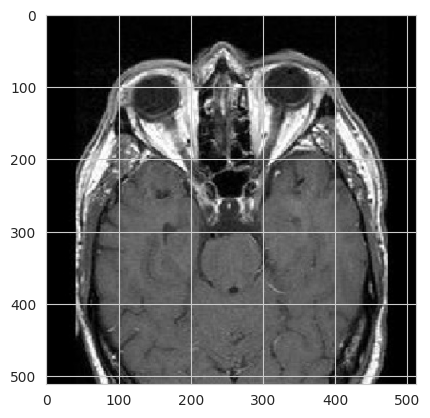

In [ ]:
plt.imshow(X_train[0])

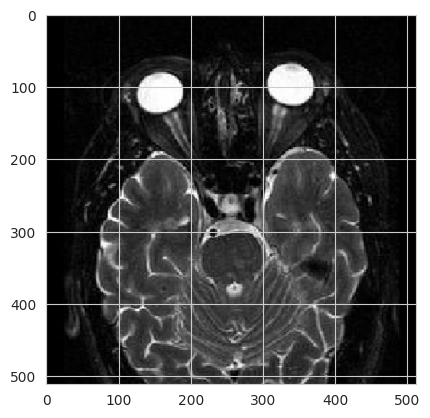

In [ ]:
plt.imshow(X_train[0])

In [ ]:
main_dir = "/content/drive/MyDrive/KDT_project/"
classification_dirs = [("no",), ("yes",)]
resolution = 512

def load_images(root_dir_name):
    x = []
    y = []

    for label, sub_dir_names in enumerate(classification_dirs):
        for sub_dir_name in sub_dir_names:
            print(f"loading {root_dir_name} {sub_dir_name}")
            sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
            for image_name in os.listdir(sub_dir_path):
                image_path = os.path.join(sub_dir_path, image_name)
                image = preprocessing.image.load_img(image_path, target_size=(resolution, resolution))
                x.append(image)   # 이미지를 numpy array로 변환
                y.append(label)

    x = np.array(x) / 255.0
    y = np.array(y)

    return x, y
    return x, y

In [ ]:
X_train.shape

(1078, 1, 512, 512, 3)

In [ ]:
 img_tensor = np.expand_dims(img_tensor, axis=0)  #

 img_tensor.shape

In [ ]:
main_dir = "/content/drive/MyDrive/KDT_project/"
classification_dirs = [("no",), ("yes",)]
resolution = 64

def load_images(root_dir_name):
    x = []
    y = []

    for label, sub_dir_names in enumerate(classification_dirs):
        for sub_dir_name in sub_dir_names:
            print(f"loading {root_dir_name} {sub_dir_name}")
            sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
            for image_name in os.listdir(sub_dir_path):
                image_path = os.path.join(sub_dir_path, image_name)
                image = preprocessing.image.load_img(image_path, color_mode="grayscale", target_size=(resolution, resolution))
                x.append(preprocessing.image.img_to_array(image))
                y.append(label)

    x = np.array(x) / 255.0
    y = np.array(y)

    return x, y
    return x, y

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_train = plt.imread('/content/drive/MyDrive/KDT_project/train/data/yes')
y_train = plt.imread('/content/drive/MyDrive/KDT_project/train/data/yes')
X_test = pd.read_csv('/content/test.zip')


In [ ]:
path_to_zip_file = '압축파일 경로'
directory_to_extract_to = '압축 풀고 저장할 경로'

import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
!unzip /content/titanic.zip